In [1]:
import data_cleaning as dc
import plots
import statsmodels.api as sm

emps=dc.get_cleaned_emp_list()
data=dc.get_data_for_plots(emps)

# Cincinnati Employee Snapshot

Intro text
Intro text
Intro text
Intro text


<img align="left" src='../images/output/employee_snapshot.png'>

Gender Representation
- Women in the workforce
- Women in Protective Services
- Women in Leadership
-Tenure

Racial Representation
- Workforce

- Protective Services
- Leadership

Age Representation
- Is there a need for knowledge transfer in specific areas? More people nearing retirement age


## Gender Representation

According to the US Census Bureau's American Community Survey, Cincinnati is approximately 51% female. However, women only make up 37% of the municpal workforce. While this discrepancy stands out, it's important to note that 29% of the city's employees are Protective Service Workers which is primarily made up of police officers and fire fighters and these roles are predominantly held by men even at the national level. When Protective Service Workers are excluded, the representation of women in the general workforce increases to 46%.

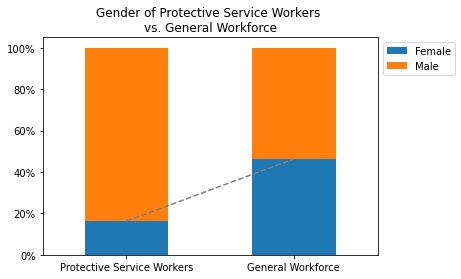

### General Workforce
Of the 4,440 employees in the General Workforce, 2,055 are women. A one-sample z-test was conducted to test whether the proportion of women in the city's general workforce is greater than or equal to what we're seeing in the community at large. The results were significant with a z-value of -6.30 and a p value <0.05. We reject the null hypothesis that the proportion of women in the general municipal workforce is equal to or greater than that of the city itself.


```python
#Z-test of women in the workforce
women_in_general_workforce=data['pro_vs_general_gender'].loc['General Workforce','Female']
general_workforce=data['pro_vs_general_gender'].loc['General Workforce'].sum()
null_hypothesis=0.51
print(sm.stats.proportions_ztest(women_in_general_workforce,general_workforce,null_hypothesis,'smaller'))

(-6.3025755103471495, 1.463699196636838e-10)
```   

### Women in Policing
There are 1,000 police officers employed by the city, and 230 of them are women who hold positions from Police Officer to Police Captain.  According to the Bureau of Justice Statistics, the national average for sworn women police offers in county and city departments is approximately 13%.  Using a one-sample z-test, we assess whether the proportion of women in the city's police department is less than or equal to the national average of women in policing. The results were significant with a z-value of 7.51 and a p value <0.05. We reject the null hypothesis that the proportion of women in Cincinnati's police department is less than or equal to the national average.

```python
#Z-test of women in policing
women_in_policing=data['gender_police_fire'].loc['Police','Female']
police_force=data['gender_police_fire'].loc['Police'].sum()
null_hypothesis=0.13
print(sm.stats.proportions_ztest(women_in_policing,police_force,null_hypothesis,'larger'))

(7.514337885441285, 2.859983971325954e-14)

```

### Women in the Fire Department
While the number of women in the Police Department is well into the double digits, we see lower employment rates of women in the Fire Deparment.  Only 49 of the 801 Fire Fighters in the city are women. Using data from the National Fire Protection Association, we learn that nationally only 8% of fire fighters are women.  We hypothesize that the proportion of women in the Fire Department is greater than or equal to the national average. The results were significant with a z-value of -2.22 and a p value <0.05. 

```python

#Z-test of women in fire departments
women_fire_fighters=data['gender_police_fire'].loc['Fire Department','Female']
fire_department=data['gender_police_fire'].loc['Fire Department'].sum()
null_hypothesis=0.08
print(sm.stats.proportions_ztest(women_fire_fighters,fire_department,null_hypothesis,'smaller'))


(-2.2233643575525552, 0.013095620529943387)
```

### Women in Leadership
Officials and Administrators are responsible for setting and enacting policies or for maintaining general oversight of a department or an agency. Individuals holding these roles would be equivalent to senior management in a business or corporation. Typically, women are not represented equally when it comes to leadership roles. In Cincinnati, 106 female and 145 male employees respectively are listed as Officials and Administrators.

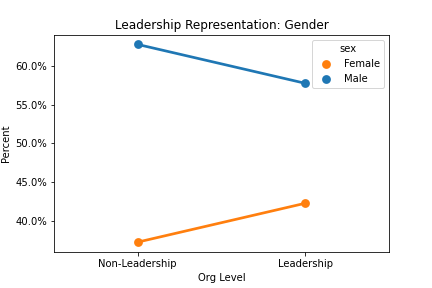


A two sample z-test was conducted to see if women in the city's leadership roles are represented at a rate greater than or equal to men. Based on the results, we fail to reject the null hypothesis with a z-value of 1.61 and a p value> 0.05. Although the results, are not statistically significant, the 15% gap in representation between men and women at the senior leadership level is still meaningful.



```python
#z-test comparing women and men in leadership
leaders=data['leaders_by_gender']['Leadership']
emp_count=data['leaders_by_gender'].sum(axis=1)

print(sm.stats.proportions_ztest(leaders,emp_count,0,'smaller'))

(1.6126328668507695, 0.9465878532344753)

```

[note 1] Lynn Langton, Women in Law Enforcement, 1987-2008, Crime Data Brief, Washington, DC: U.S. Department of Justice, Bureau of Justice Statistics, 2010.

https://www.eeoc.gov/employers/eeoc-form-164-state-and-local-government-information-eeo-4-instruction-booklet


### Women in Protective Service Jobs
According to the National Fire Protection Association, 8% of Firefighters are women
According to the National Fire Protection Association( [^1]: https://www.nfpa.org/News-and-Research/Data-research-and-tools/Emergency-Responders/US-fire-department-profile#:~:text=In%202018%2C%2093%2C700%20(8%25),total%20number%20of%20volunteer%20firefighters)

In [6]:
emps.paygroup_label.value_counts()
female_officer_tenure=emps.loc[(emps.paygroup_label=='Police')&(emps.sex=='Female')]['tenure']
male_officer_tenure=emps.loc[(emps.paygroup_label=='Police')&(emps.sex=='Male')]['tenure']

In [10]:
print(len(female_officer_tenure))
print(len(male_officer_tenure))

230
770


In [12]:
sm.stats.ttest_ind(female_officer_tenure,male_officer_tenure,usevar='unequal',alternative='smaller')

(-0.6689927071549353, 0.2519480598329936, 389.8185304970826)